In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn import model_selection

In [14]:
d = {'sales': [50,70,88,112,120,135,150], 'price': [7.5, 6.0,5.8,5.0,4.5,4.0,3.7], 'ad_cost':[35,40,45,50,55,68,75]}

In [15]:
d

{'sales': [50, 70, 88, 112, 120, 135, 150],
 'price': [7.5, 6.0, 5.8, 5.0, 4.5, 4.0, 3.7],
 'ad_cost': [35, 40, 45, 50, 55, 68, 75]}

In [16]:
df = pd.DataFrame(data=d)

In [17]:
df

,sales,price,ad_cost
0,50,7.5,35
1,70,6.0,40
2,88,5.8,45
3,112,5.0,50
4,120,4.5,55
5,135,4.0,68
6,150,3.7,75


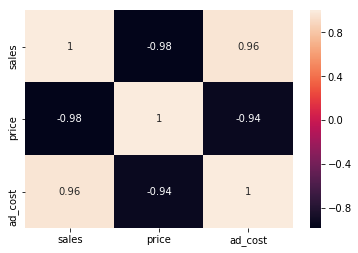

In [18]:
sns.heatmap(df.corr(),annot=True)

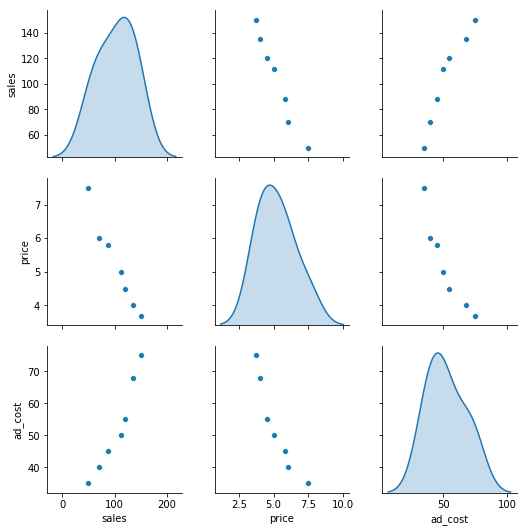

In [19]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lin_reg=LinearRegression()

In [22]:
X = df[['price','ad_cost']]
Y = df['sales']

In [23]:
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
ypred = lin_reg.predict(X)

In [25]:
lin_reg.score(X,Y) #internal computations will be done then we will go for R2  (Acc. is not there in Regression)

0.981227597252123

In [26]:
lin_reg.coef_ #b1 value

array([-17.70648072,   0.8664618 ])

In [27]:
lin_reg.intercept_ #b0 values

150.34694320313025

In [28]:
np.corrcoef(df['price'],df['sales'])

array([[ 1.        , -0.98266754],
       [-0.98266754,  1.        ]])

In [29]:
df.corr()

,sales,price,ad_cost
sales,1.000000,-0.982668,0.963159
price,-0.982668,1.000000,-0.935123
ad_cost,0.963159,-0.935123,1.000000


In [30]:
ypred

array([ 47.87450094,  78.76653104,  86.64013621, 105.1376298 ,
       118.32317918, 138.44042299, 149.81759983])

In [31]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(Y,ypred))
rms

4.55117999268885

In [32]:
new_col = df['price']*df['ad_cost']
new_col

0    262.5
1    240.0
2    261.0
3    250.0
4    247.5
5    272.0
6    277.5
dtype: float64

# Interaction Term

In [33]:
X = pd.concat([X,new_col],axis=1)
X.columns=['price','ad-cost','price:ad_cost']

In [34]:
X

,price,ad-cost,price:ad_cost
0,7.5,35,262.5
1,6.0,40,240.0
2,5.8,45,261.0
3,5.0,50,250.0
4,4.5,55,247.5
5,4.0,68,272.0
6,3.7,75,277.5


In [35]:
model2 = LinearRegression()
model2.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
ypred2 = model2.predict(X)

In [37]:
model2.coef_

array([-27.01700412,  -0.20744374,   0.47000816])

In [38]:
model2.intercept_

133.78716654835216

# Advertising Data 

In [43]:
A = pd.read_csv('Advertising.csv',index_col=0)

In [44]:
A.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


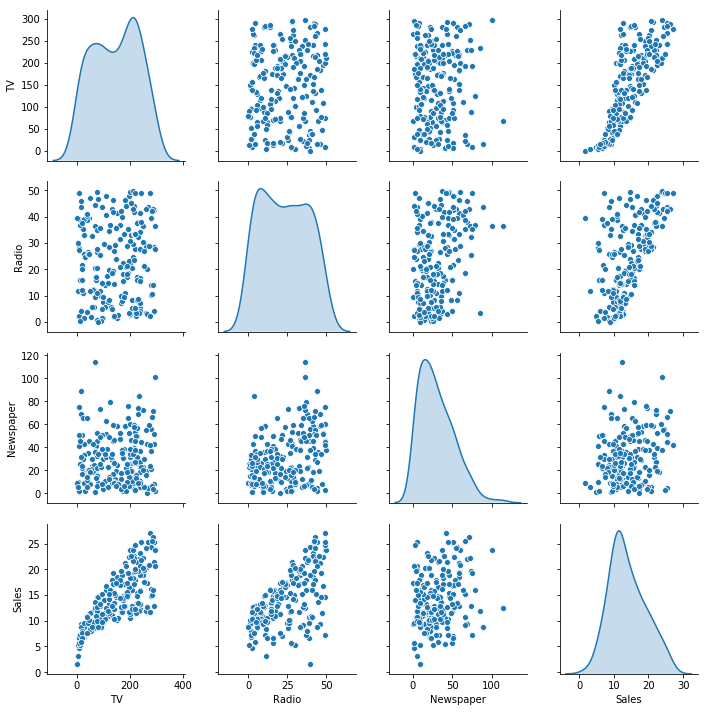

In [45]:
sns.pairplot(A,diag_kind='kde')

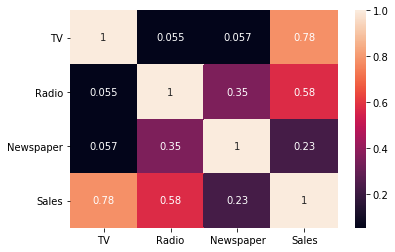

In [46]:
sns.heatmap(A.corr(),annot=True)

In [47]:
modelTV = LinearRegression()

In [48]:
y_a = A['Sales']
x1 = A[['TV']]
x2 = A[['Radio']]
x3 = A[['Newspaper']]
B1 = A[['TV','Radio']]
B2 = A[['TV','Newspaper']]
B3 = A[['Radio','Newspaper']]
X1 = A[['TV','Radio','Newspaper']]

In [49]:
M1=LinearRegression()

In [50]:
M1.fit(X1,y_a)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
ypred1 = M1.predict(X1)

In [53]:
ypred1[1]

12.337854820894357